# PROC SGPLOT

In the previous section, we explored creating bar graphs within a `proc freq` step. However, this approach offers limited customization options. By using a different procedure, `proc sgplot`, we can easily produce a wide range of high-quality statistical graphics with greater flexibility and layering options. This procedure is commonly used to generate scatter plots, bar charts, line plots, histograms, box plots, and more. It is part of the SAS ODS Graphics system, which allows users to visualize data effectively for analysis and reporting.

:::{admonition} *General `PROC SGPLOT` statement*
:class: dropdown

```
PROC SGPLOT DATA = input-table <options>;
     plot statement(s) / <options>;
    <appearance statements>;
   <additional filtering/formatting/etc>;
RUN;

```
1. `PROC SGPLOT DATA = input-table <options>;`
   - `PROC SGPLOT` starts the procedure, and `DATA = input-table` specifies the dataset you want to use for the plot
   - `<options>` within PROC SGPLOT can include additional procedure-level settings
2. `plot statement(s) / <options>;`
   - The `plot statement(s)` specify the type of plot you want to create, such as scatter, vbar, hbar, series, or histograms. Multiple plot statements can be included to layer different types of graphs on the same chart.
   - The `/ <options>` allows for plot-specific customization, such as setting labels, colors, markers, or axis opti
3. `<appearance statements>;`
   - these statements control the overall appearance of the plot, such as adding titles, labels, legends, or setting axis attributes
5. `<additional filtering/formatting/etc>`
   - this section can include additional options to refine the plot, including filtering data, formatting the value output.

Here's an example of a simple vertical bar chart below.

### Example 1


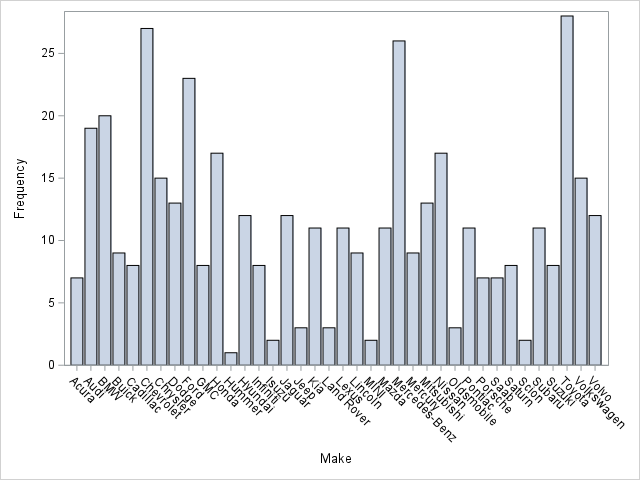

In [10]:
proc sgplot data=sashelp.cars;
    vbar Make;
run;

:::{admonition} (ex.1) Code Breakdown:
:class: important

The code above create a vertical bar chart showing the count of each unique car make in the sashelp.cars dataset. Additionally, there was no custom option set so the default behavior was used (ie the nvalues appear are counts and not percent or average).

Let's modify it below by setting the y-axis, or response variable, to a numeric value from our dataset: MSRP. We’ll also specify that we want the bars to represent the average MSRP for each car make. Our options will always be in the same statement as the plot and will be indicated by the `/`.

Let's also change the color of the bars to be a green instead of blue.

:::


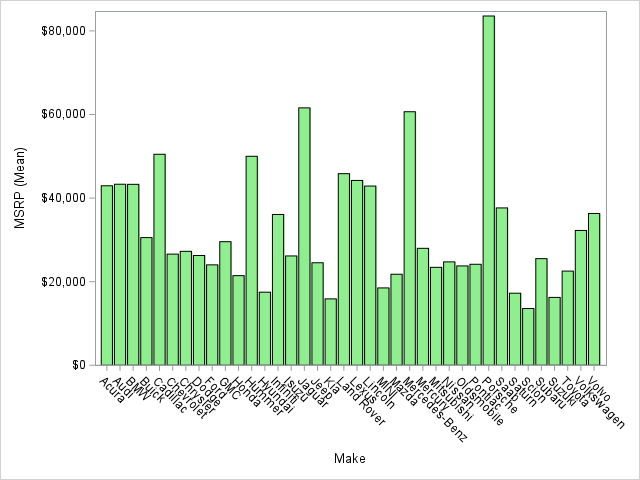

In [24]:
proc sgplot data = sashelp.cars;
    vbar Make / response=MSRP stat=mean fillattrs=(color=lightgreen);
run;

The plot above shows the average MSRP for each car make in the color `lightgreen`. Here, we can clearly see that cars of the Make Porsche have the highest average MSRP.

### Plot Compatibility
A key advantage of `sgplot` is the ability to layer multiple types of plots. Plot types are grouped into categories: Basic, Distribution, Fit and Confidence, and Categorization. However, only certain plot types can be layered together. Please refer to the table below to see which plots belong to each category.

:::{admonition} Plots
:class: dropdown

| BASIC        | DISTRIBUTION | FIT AND CONFIDENCE | CATEGORIZATION |
|--------------|--------------|--------------------|----------------|
| Band         | Density      | Ellipse           | Dot            |
| Bubble       | Hbox         | Loess             | Hbar           |
| Block        | Histogram    | Pbspline          | Hbarbasic      |
| Dropline     | Vbox         | Reg               | Hline          |
| Ellipseparm  |              |                   | Vbar           |
| Hbarparm     |              |                   | Vbarbasic      |
| Heatmap      |              |                   | Vline          |
| Heatmapparm  |              |                   | Waterfall      |
| Highlow      |              |                   |                |
| Lineparm     |              |                   |                |
| Needle       |              |                   |                |
| Polygon      |              |                   |                |
| Refline      |              |                   |                |
| Scatter      |              |                   |                |
| Series       |              |                   |                |
| Spline       |              |                   |                |
| Step         |              |                   |                |
| Text         |              |                   |                |
| Vbarparm     |              |                   |                |
| Vector       |              |                 
:::
Basic plots are compatible with other Basic plots as well as Fit & Confidence plots. Distribution plots can be layered with other Distribution plots, and Categorization plots are compatible with other Categorization plots. When we say "compatible," we mean that these plots can be layered on top of each other.

Please refer to the documentation here for more information: https://documentation.sas.com/doc/en/pgmsascdc/9.4_3.5/grstatproc/p0yud64khw8fuin1xgr85dgxbb7t.htm  |                |


You may have noticed different variations of plots, ie `vbar/hbar` and `vbarparm/hbarparm`. While these plots all create bar charts, there are important differences in how they handle data and when each should be used. Here are the key differences: 

| Feature                 | VBAR / HBAR                                 | VBARPARM / HBARPARM                         |
|-------------------------|---------------------------------------------|---------------------------------------------|
| Data Requirements       | Raw data                                    | Pre-summarized data                         |
| Automatic Summarization | Yes                                         | No                                          |
| Response Variable       | Optional                                    | Required                                    |
| Typical Use Case        | Counts, frequencies, or simple statistics (e.g., mean) | Custom metrics or already aggregated da


`vbar` and `hbar` automatically count or summarize data within `proc sgplot`. This is most ideal with raw data. `vbarparm` and `hbarparm` do not perform any calculations on the data, they plot the data "as-is". This plot is ideal when you already have calculated values in the dataset that you want to display.

:::{tip}
More so, all plot types that end with "parm" (like `VBARPARM`, `HBARPARM`, `ELLIPSEPARM`, and `LINEPARM`) require pre-summarized or pre-calculated data. These "parm" plot types do not perform any internal calculations or aggregations, and they expect the values you provide to be final and ready for plotting.
:::a  |
